In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def bin_plot(df, x_label, y_label, n_bins, w_label=None, scale=1, ax=None, **plot_kwargs):
        
    '''
        create a bin plot with your feature (x_label), binned into (num_bin) quantiles 
        (with equal count), on the X-axis, and the corresponding mean of the target
        variable (y_label) along with one standard error around mean on the Y-axis. 
        
        Parameters
        ----------------
        x_label: str
            label of feature x
            
        y_label: str
            label of target
            
        w_label: str
            label of weight if provided
            
        scale: float, default=1
            where to plot the point with the bin = mean(bin) * scale
            
        ax: axes
            ax to plot on, if None, the function will create one
            
        n_bins: int
            number of bins
            
        **plot_kwargs: dict
            keyword and arguments of ax.plot(x, y)
    '''
        
    key = df[x_label].values
    value = df[y_label].values
    if w_label is not None:
        w = df[w_label].values
        
            
    sorted_idx = np.argsort(key)
    chunks = np.array_split(sorted_idx, n_bins)
              
        # x axis on the plot: bin mean
    x = np.ones(n_bins)
        # boundary of the bins
    b = np.ones(n_bins)
        # y axis on the plot: bin mean
    y = np.ones(n_bins)
        # confidence of y: bin std
    c = np.ones(n_bins)
        
    for bin_idx, idx in enumerate(chunks):
            
        x[bin_idx] = np.mean(key[idx]) * scale
        b[bin_idx] = np.max(key[idx])
        if w_label is not None:
            y[bin_idx] = np.average(value[idx], weights=w[idx])
        else:
            y[bin_idx] = np.mean(value[idx])
        c[bin_idx] = np.std(value[idx]) / np.sqrt(len(value[idx]))
        
    if ax is None: 
        fig, ax = plt.subplots(figsize=(10, 6))
            
    ymin = np.min(y-c) - 0.5 * abs(np.min(y-c))
    ymax = np.max(y+c) + 0.5 * abs(np.max(y-c))
            
    ax.plot(x, y, 'o-', **plot_kwargs)
    ax.fill_between(x, y-c, y+c, color='b', alpha=0.1)
    ax.vlines(b[:-1], ymin=ymin, ymax=ymax, color='grey')
    ax.set_xticks(b[:-1])
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.set_xlabel('bin boundaries, based on quantiles of {:s}'.format(x_label))
    ax.set_ylabel('within-bin means and 1 std error of {:s}'.format(y_label))
    ax.set_title('{:d} binned plot of {:s} against {:s}'.format(n_bins, y_label, x_label))
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [30]:
def scatter(df, x_label, y_label, ax=None, **plot_kwargs):
        
    '''
        plot the ordinary scatter plot
        
        Parameters
        ----------------
        x_label: str
            label of feature x
            
        y_label: str
            label of target
            
        ax: axes
            ax to plot on, if None, the function will create one
            
        **plot_kwargs: dict
            keyword and arguments of ax.scatter(x, y)
        
    '''
        
    x = df[x_label]
    y = df[y_label]
        
    if ax is None:
            
        fig, ax = plt.subplots(figsize=(10, 6))
            
    ax.scatter(x, y, **plot_kwargs)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title('Scatter plot of {:s} against {:s}'.format(y_label, x_label))
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [22]:
f = pd.read_csv('features20140101_20180101.csv')
f = f.drop(columns=['Unnamed: 0'])
f = f[f['Date']<20180000]
f = f.dropna()
f

,Id,Date,10/17res,10/17raw,16/17res,16/17raw,17ma1raw,17ma3raw,17ma5raw,17ma20raw,...,illiq16,illiq10,std_dolvol63,estVol,cleanMid17,cleanMid16,cleanMid10,vol10,ResidualNoWinsorCumReturn winsorized,y
36260,ID000BKFP37,20140331,-0.009425,-0.007606,-0.000238,0.003437,0.014919,0.003230,0.007151,0.002433,...,7.114512e-10,5.250380e-10,0.157592,0.158628,2.421065,2.429402,2.402724,66517.0,0.012796,-0.022511
36261,ID000BF82S0,20140331,0.012816,0.012986,0.001935,0.000804,-0.014858,-0.011694,-0.006621,-0.001076,...,3.873600e-09,2.222871e-09,0.015346,0.242447,94.337980,94.413820,95.571000,1862.0,-0.019670,0.000360
36262,ID000BCQ3H7,20140331,0.015288,0.023232,0.001182,0.002957,-0.007192,0.010878,0.007351,0.004845,...,1.147292e-09,9.126369e-10,0.143828,0.293701,37.219307,37.329517,38.094086,68177.0,-0.008660,0.009055
36263,ID000BDH9B8,20140331,-0.007199,-0.007545,0.001143,0.000501,0.011972,0.002978,0.006131,-0.001553,...,4.007840e-09,1.792377e-09,0.073718,0.258246,6.655427,6.658762,6.605405,35235.0,0.004784,0.007942
36264,ID000BF00N7,20140331,-0.004194,0.005832,-0.003460,-0.000094,0.000943,0.007215,0.007751,-0.000688,...,4.060902e-10,3.460995e-10,0.164901,0.226162,73.019684,73.012800,73.446740,36032.0,0.003075,-0.001919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592350,ID000H291V0,20171228,-0.004722,-0.002052,-0.000109,0.001419,-0.002521,0.000105,0.000347,0.000515,...,2.460597e-10,2.523751e-10,0.066237,0.100867,189.453220,189.722120,189.064800,2144.0,0.000481,0.000516
592357,ID000BWH908,20171228,0.003175,0.005151,-0.000452,0.001475,-0.001720,0.000082,-0.001665,-0.001215,...,5.010136e-10,3.310891e-10,0.033325,0.153246,121.481900,121.661180,122.109344,3552.0,0.002405,-0.019332
592358,ID001BQZ142,20171228,-0.002851,-0.002984,-0.008928,-0.005566,0.001403,-0.006556,-0.003613,-0.000849,...,3.464751e-10,1.796463e-10,0.026353,0.128407,51.141320,50.857480,50.988940,25807.0,-0.001434,-0.004303
592361,ID000C2V319,20171228,-0.003618,0.001893,-0.001083,0.001623,-0.002433,-0.002337,-0.003062,-0.000545,...,1.204542e-10,7.006825e-11,0.061764,0.086506,22.076485,22.112335,22.118313,71391.0,0.005906,0.009743


/Users/wangyizhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


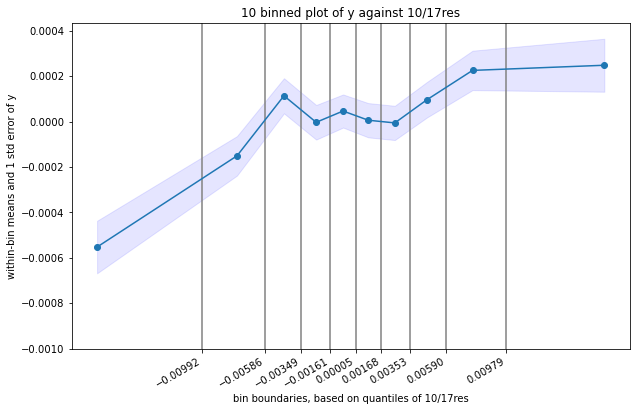

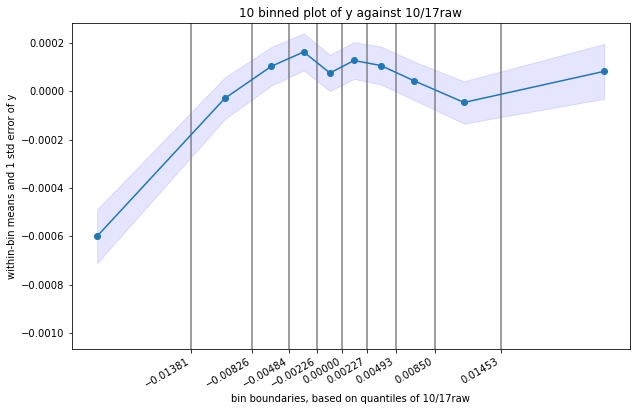

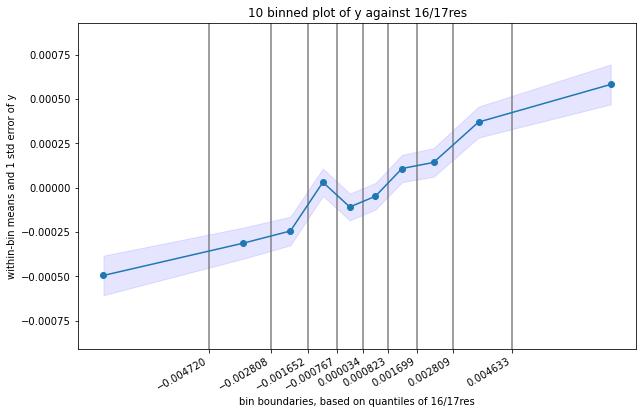

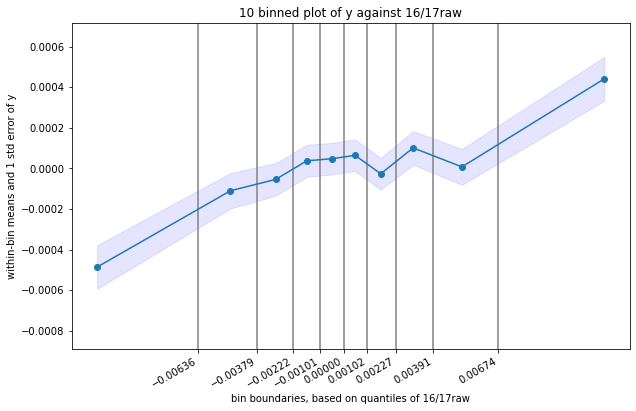

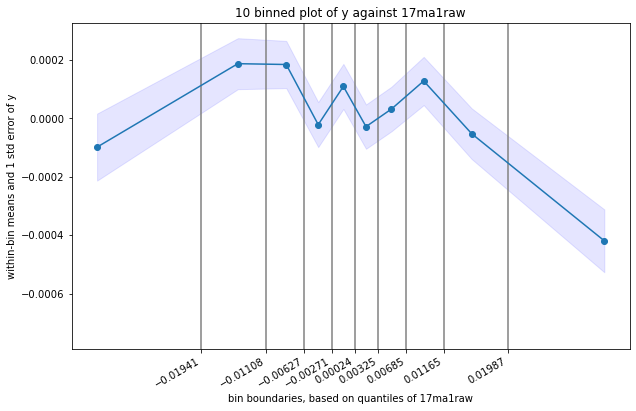

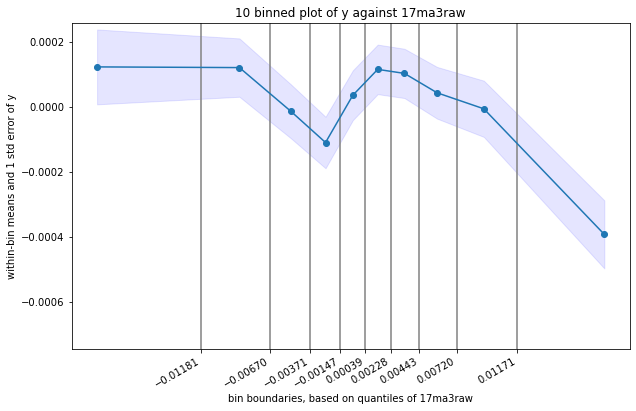

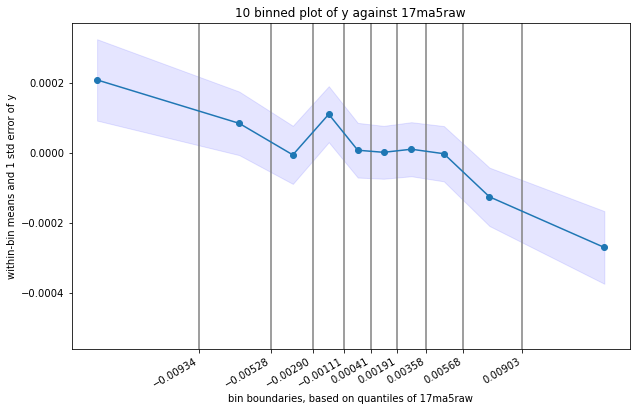

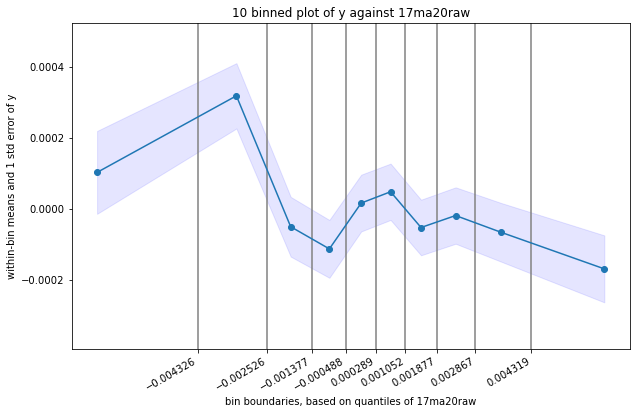

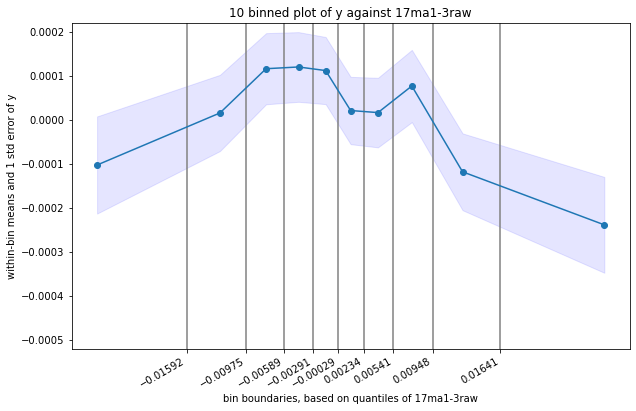

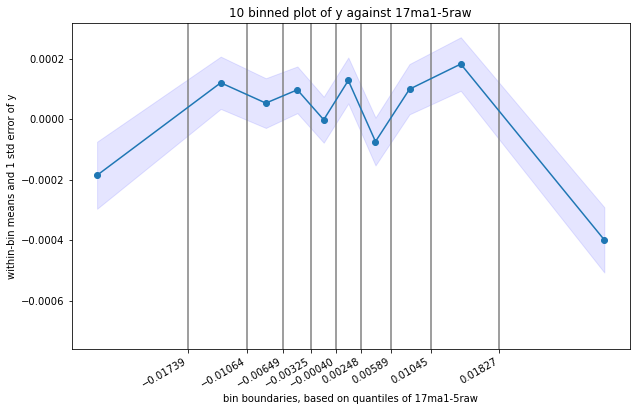

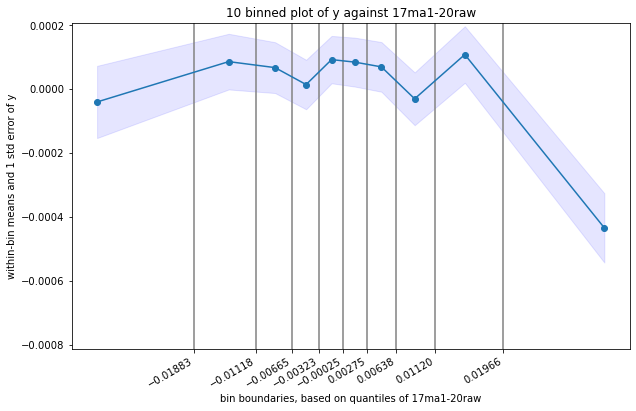

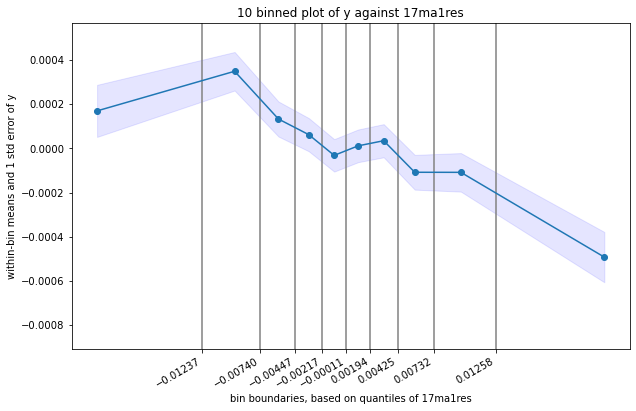

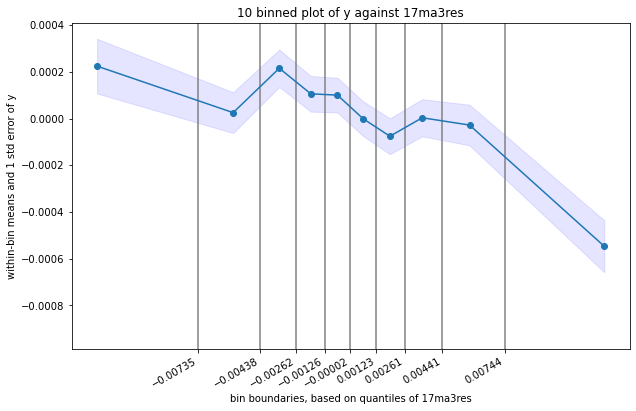

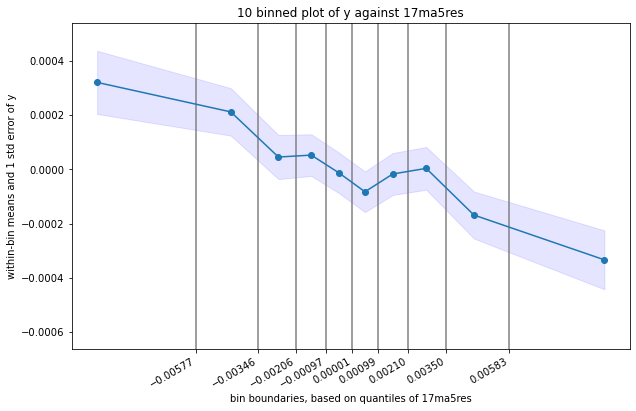

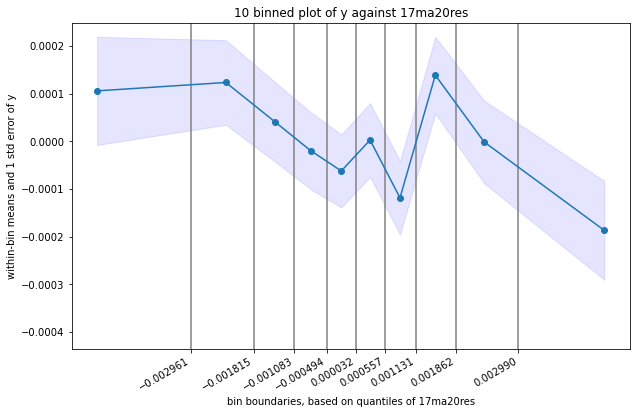

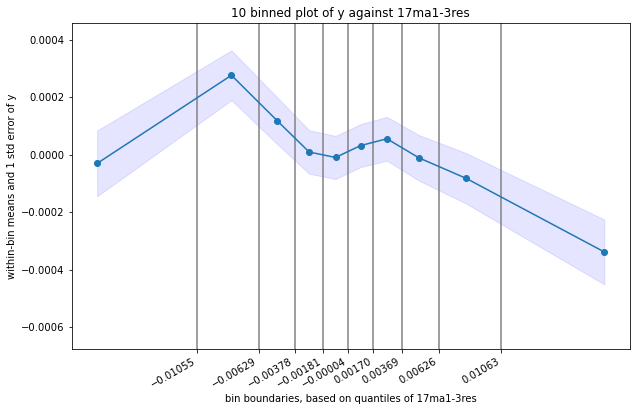

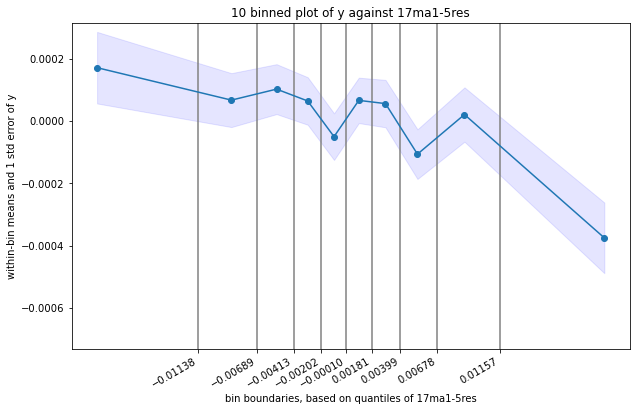

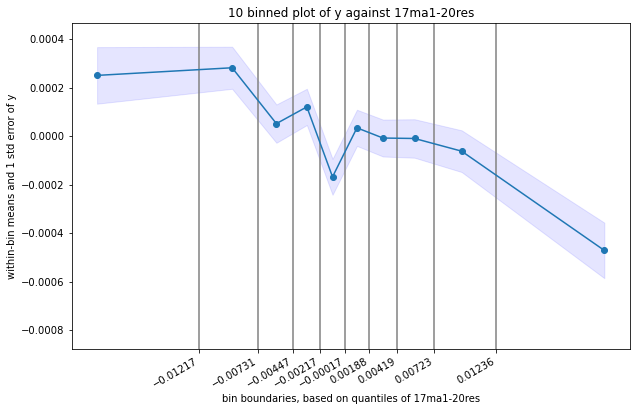

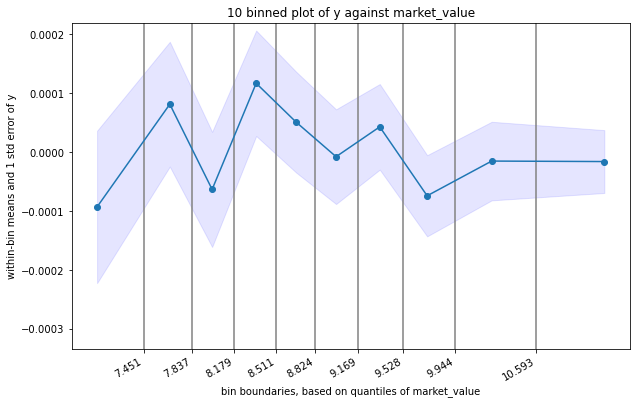

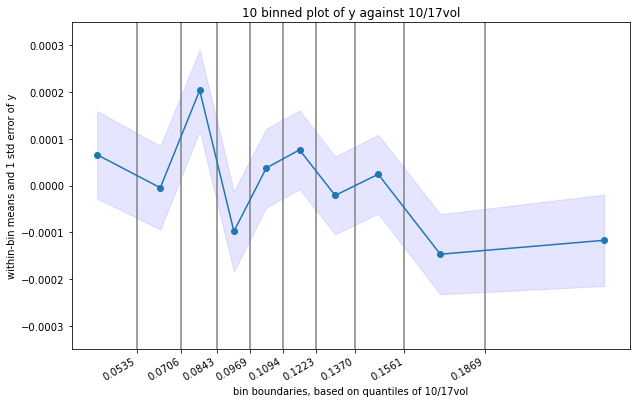

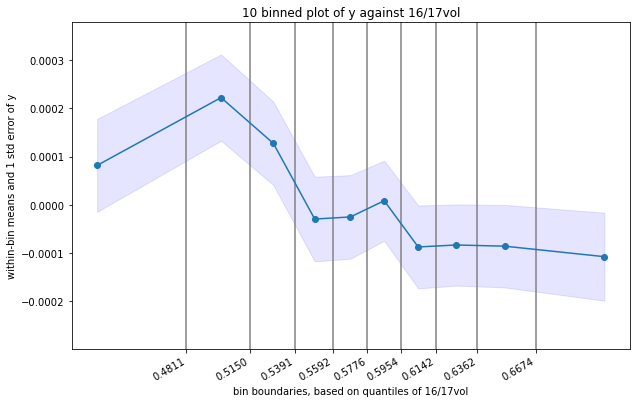

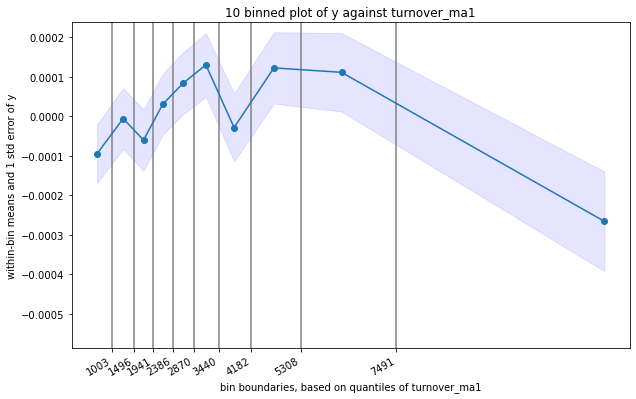

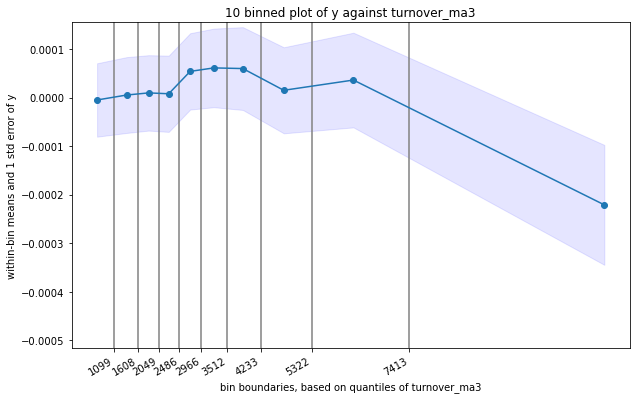

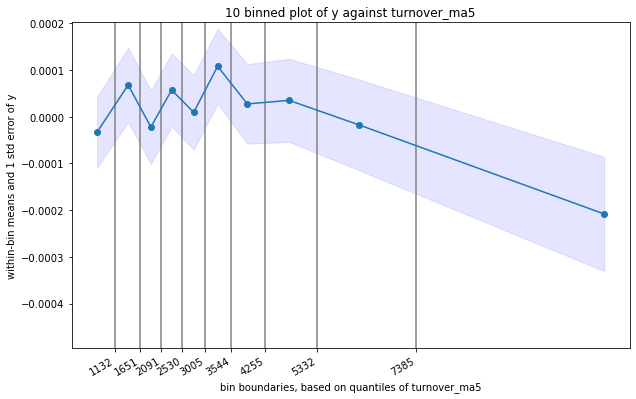

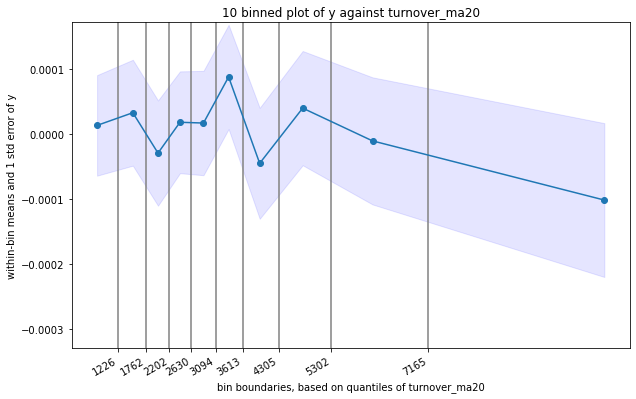

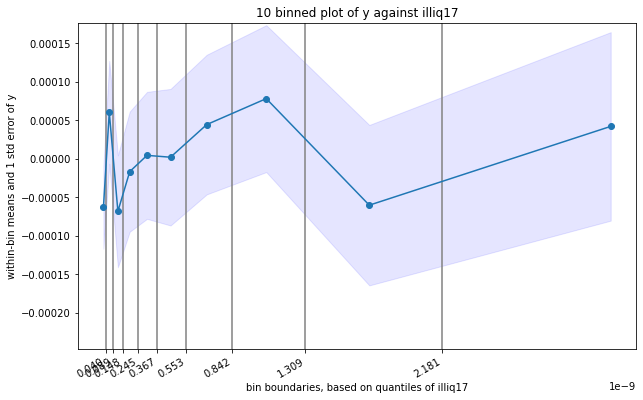

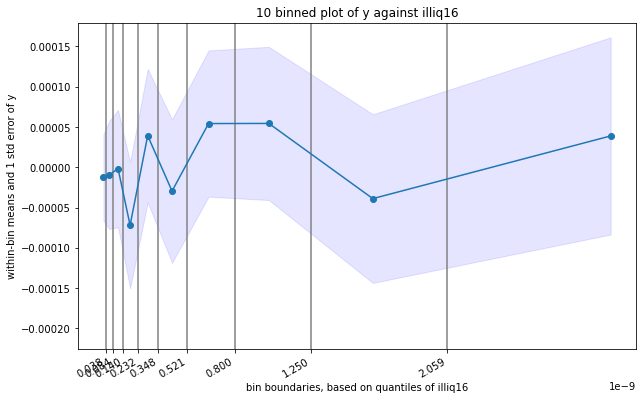

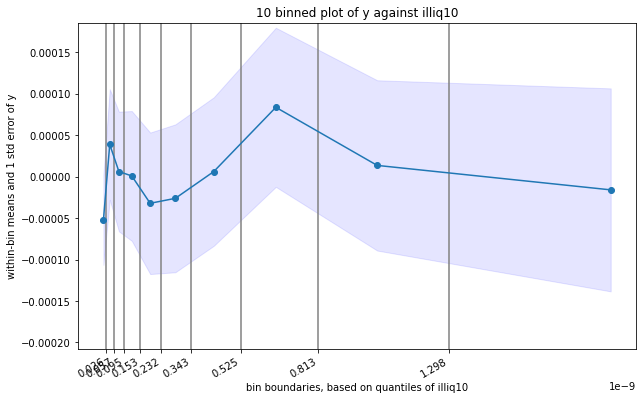

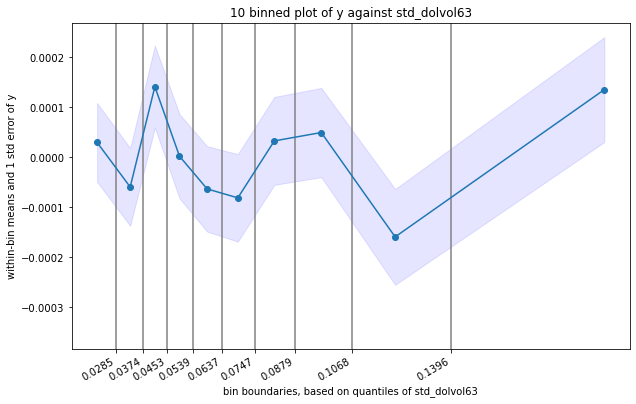

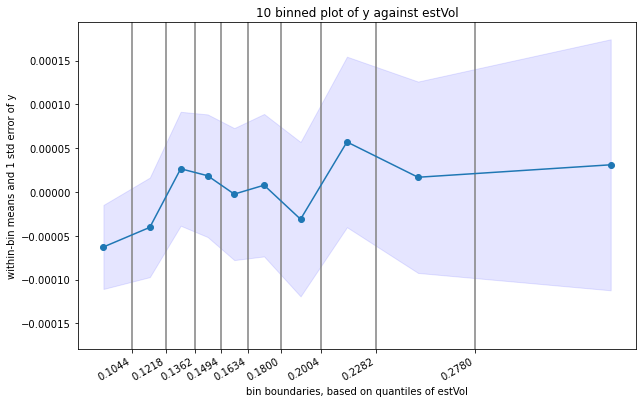

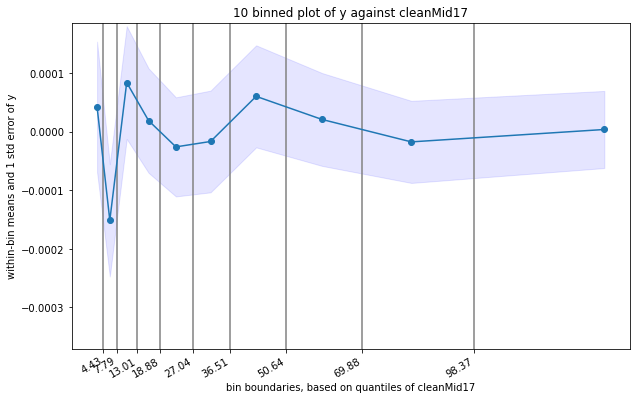

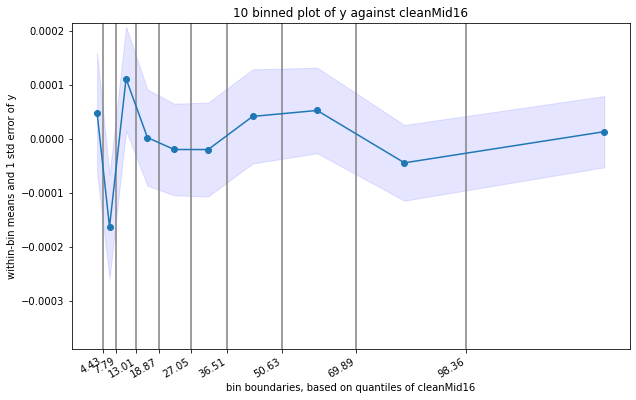

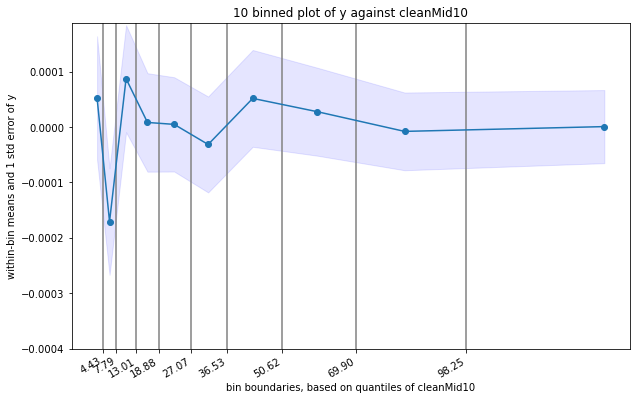

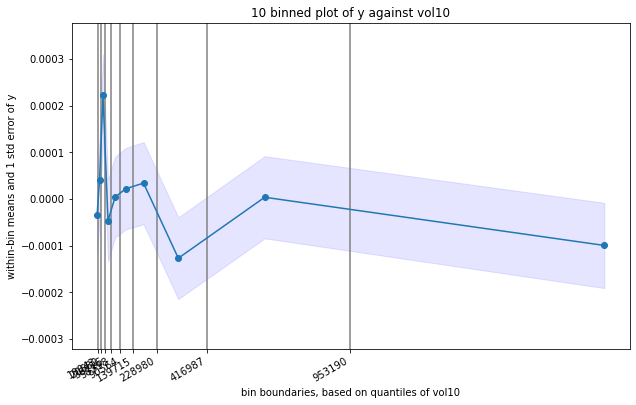

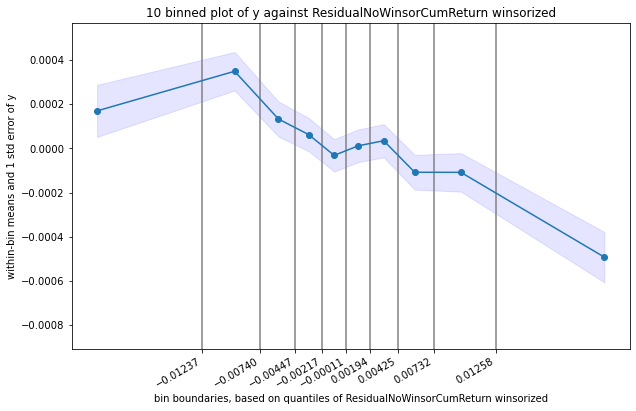

In [28]:
for x in f.columns:
    if x not in ['Id','Date','y']:
        bin_plot(f,x,'y',10)
        plt.savefig('bin_plots/'+x.replace('/','_')+'.png')

/Users/wangyizhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


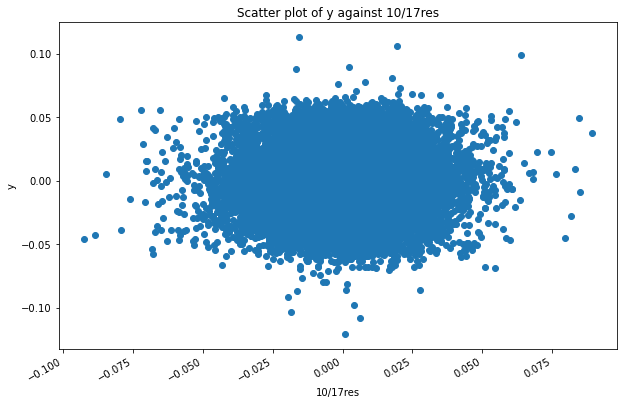

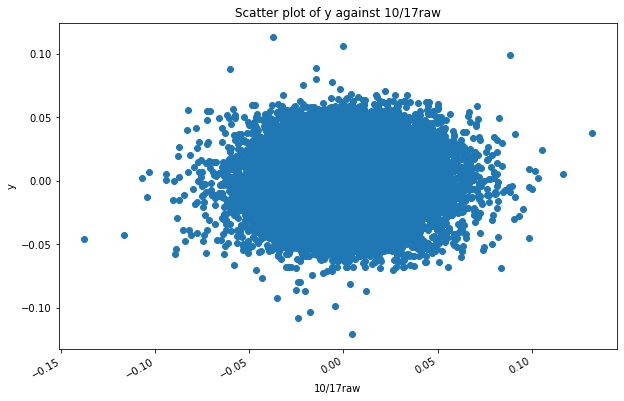

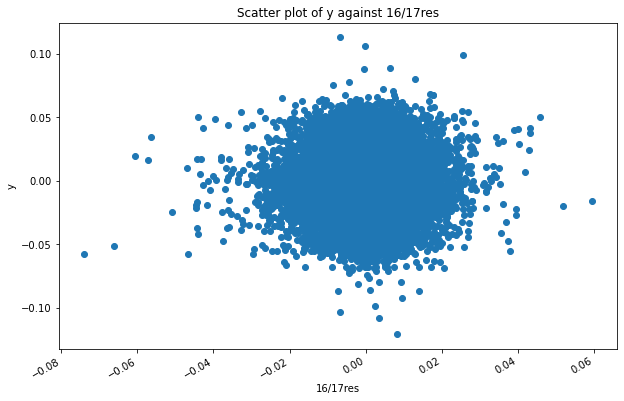

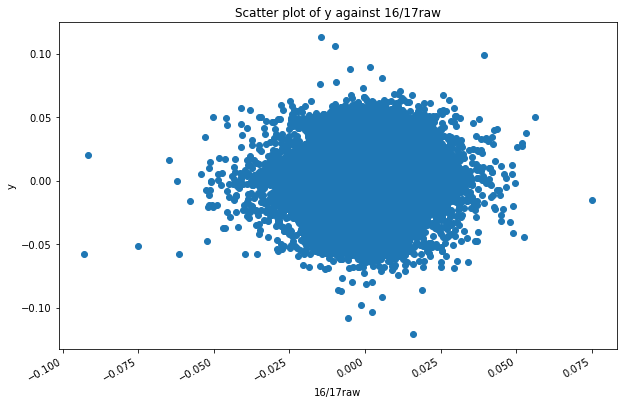

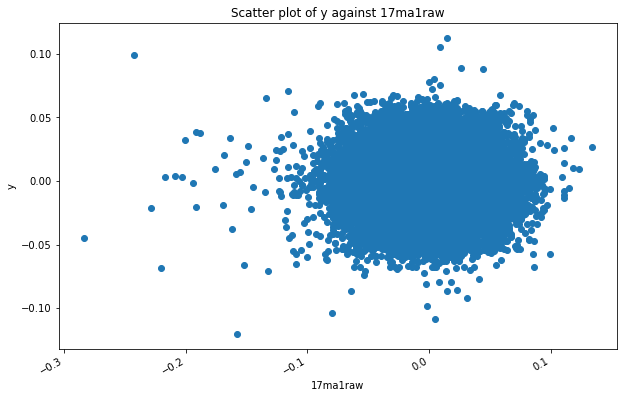

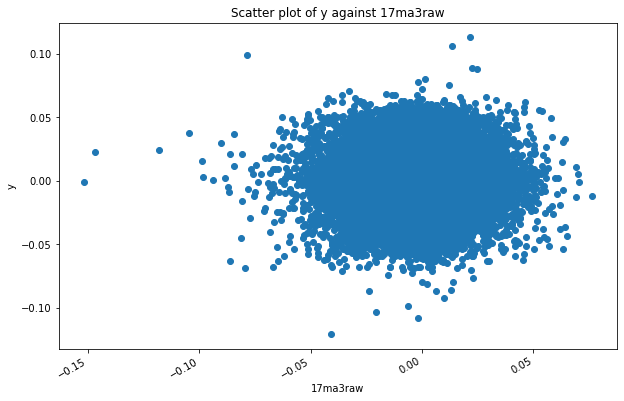

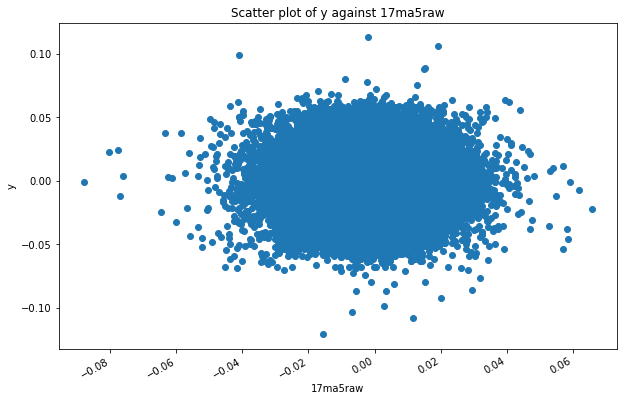

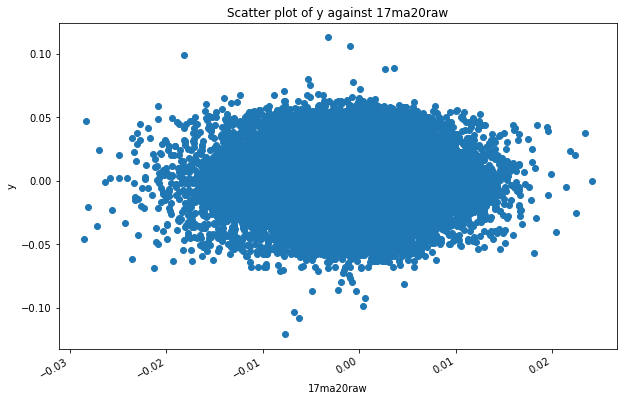

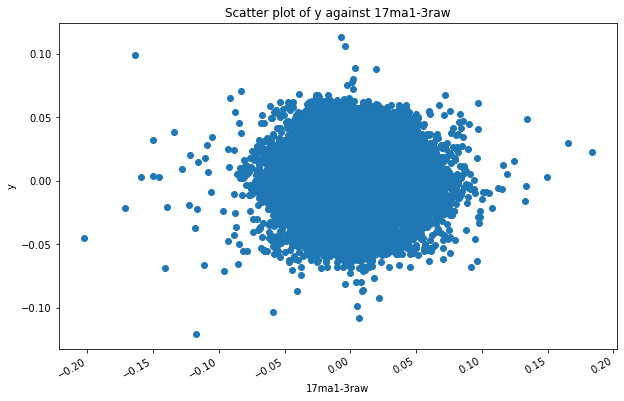

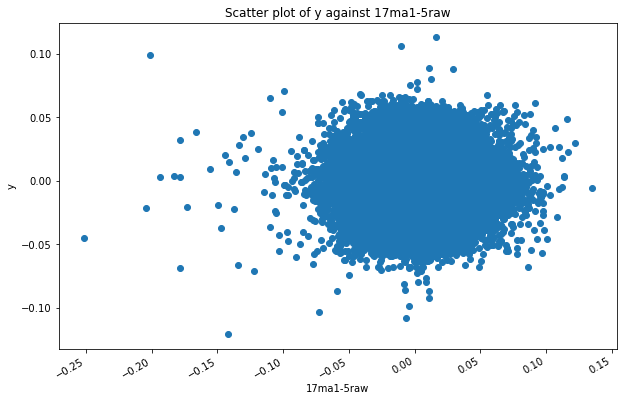

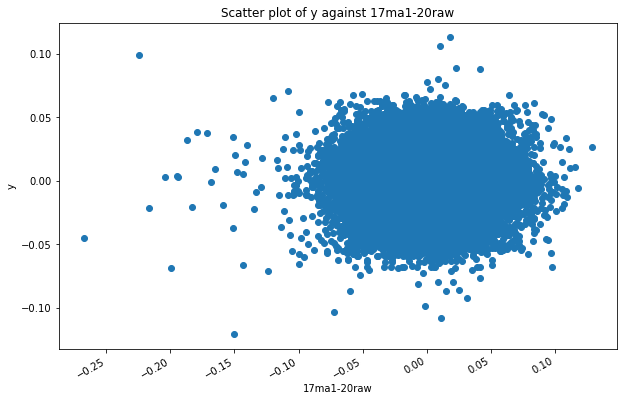

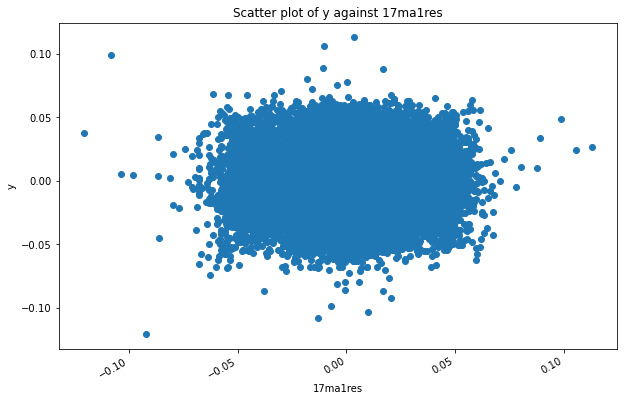

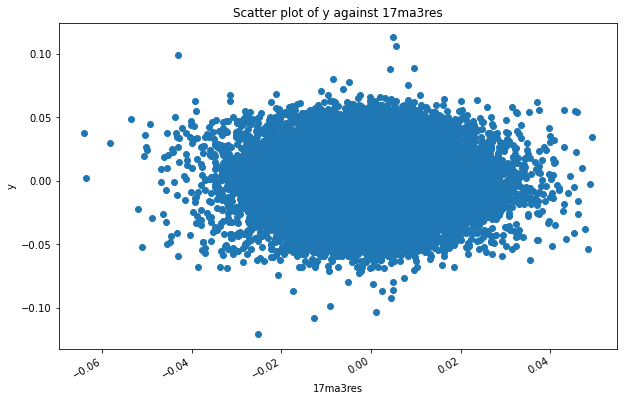

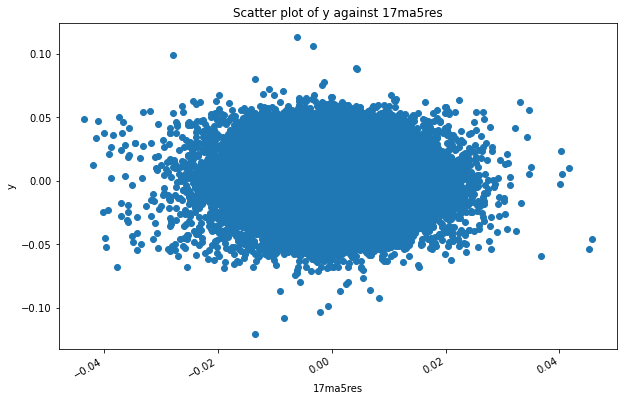

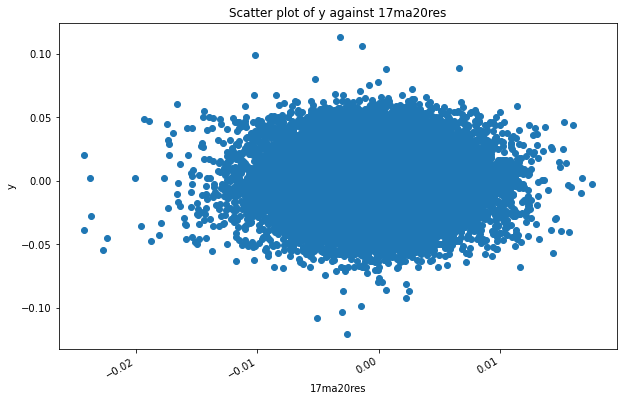

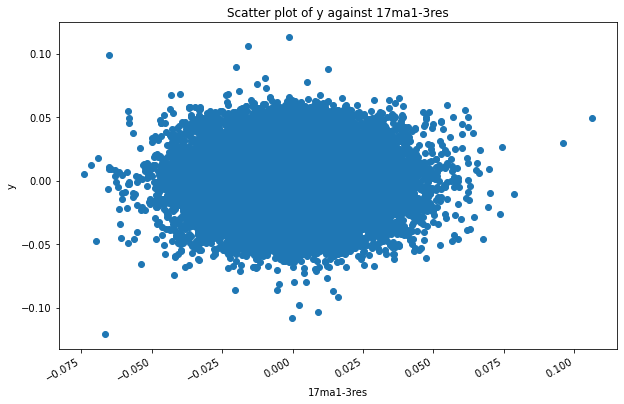

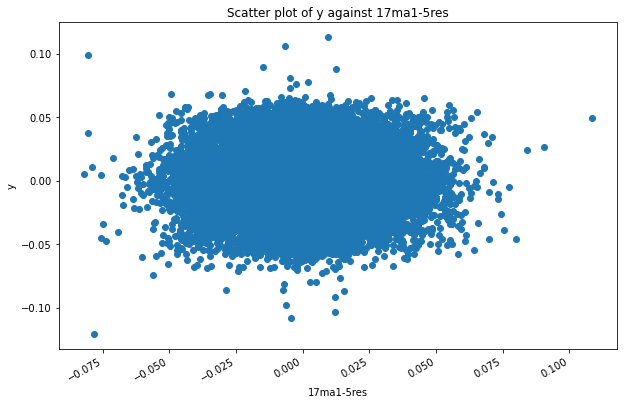

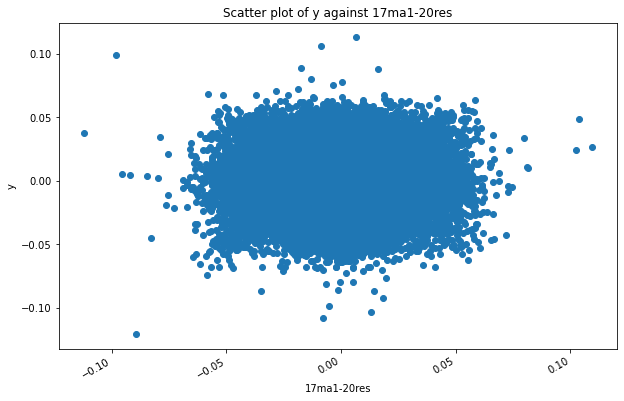

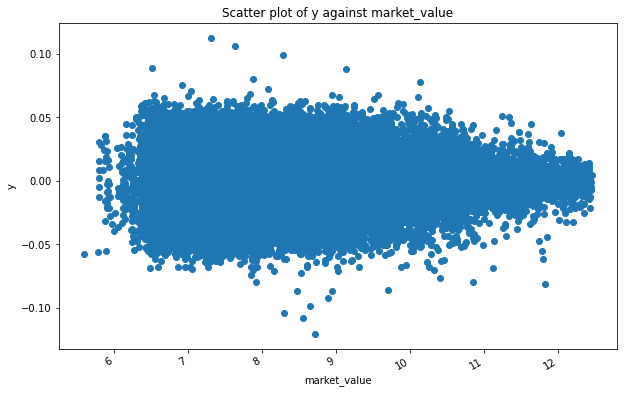

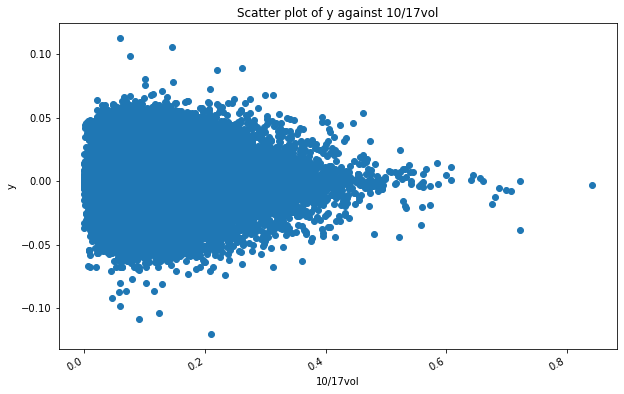

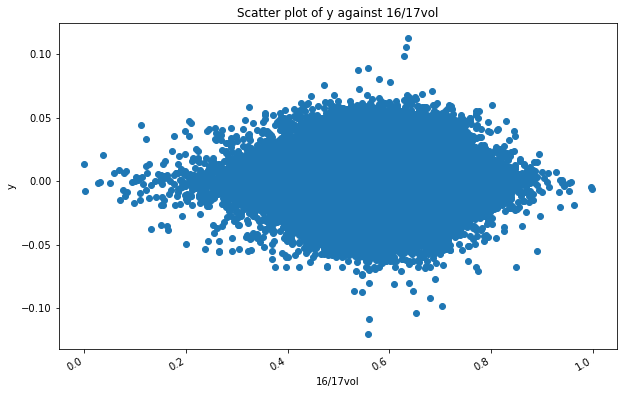

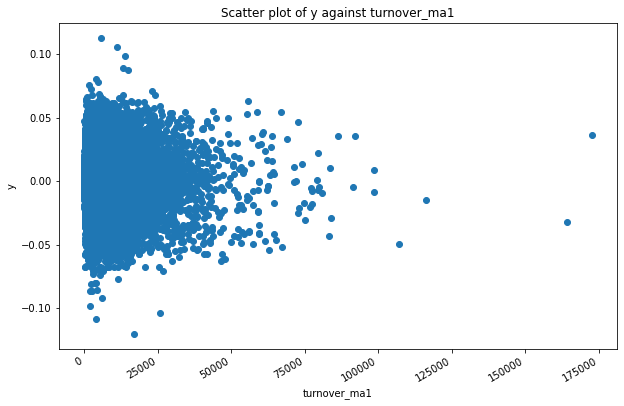

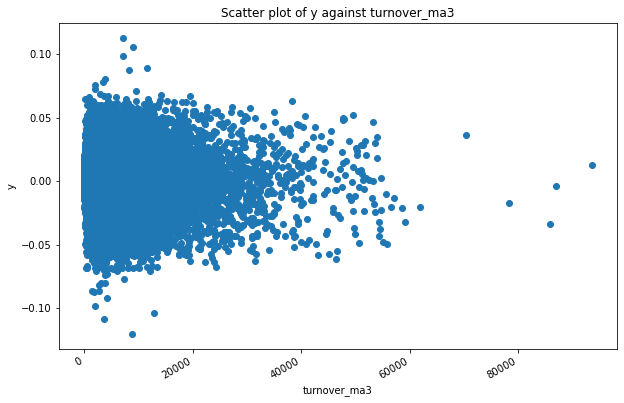

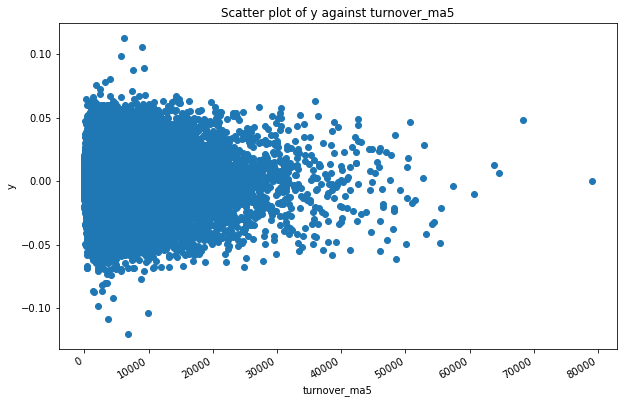

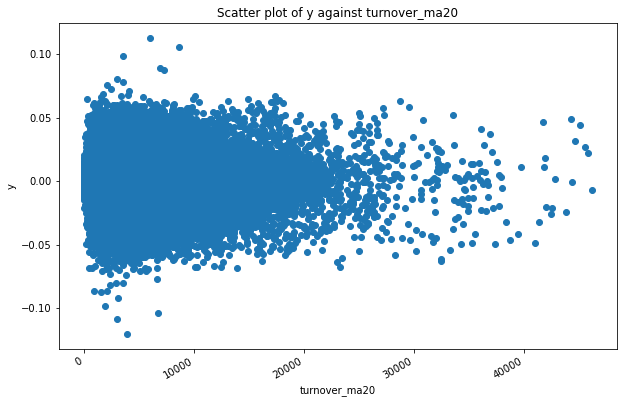

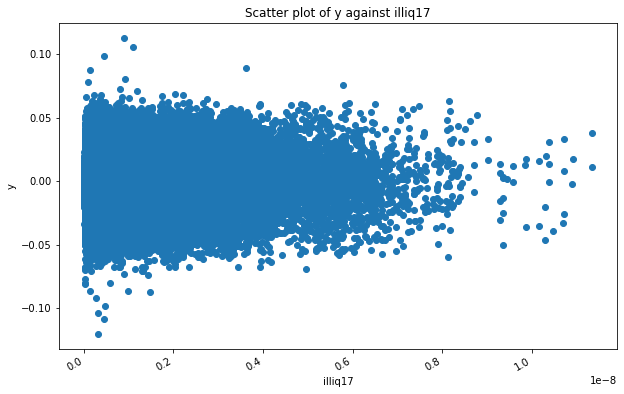

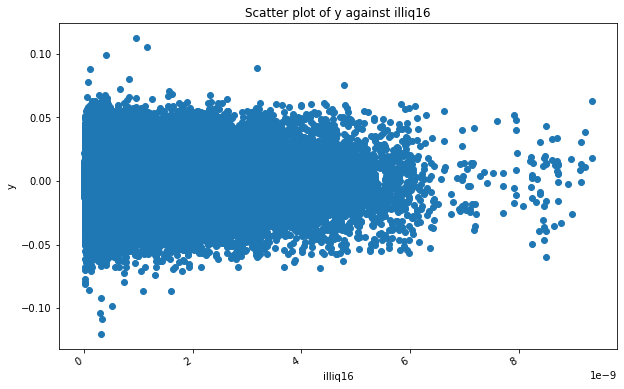

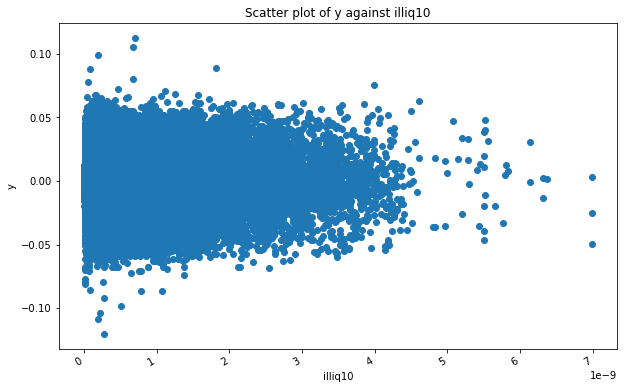

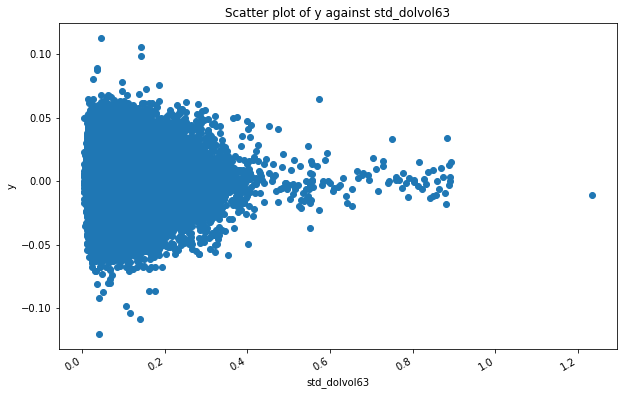

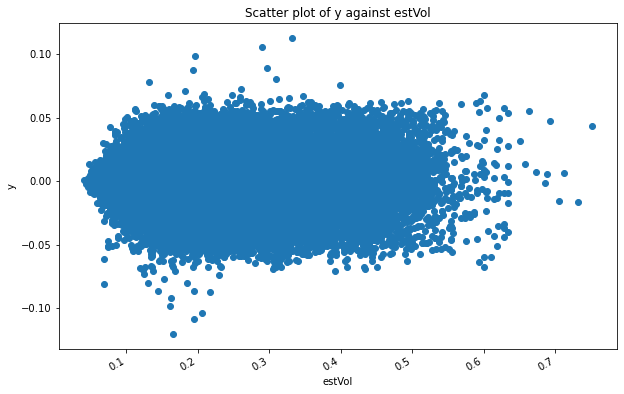

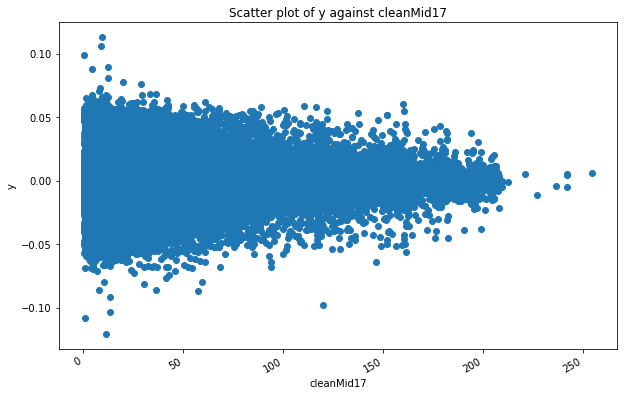

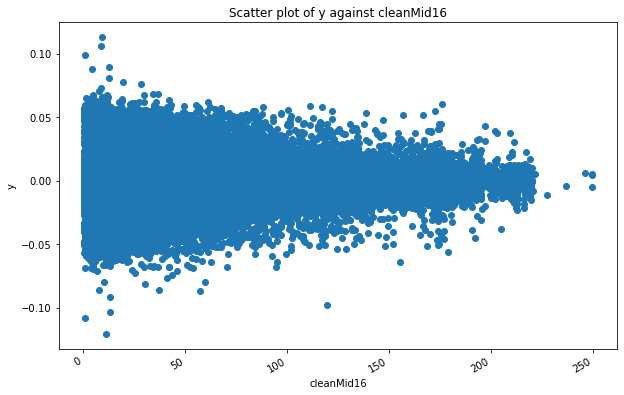

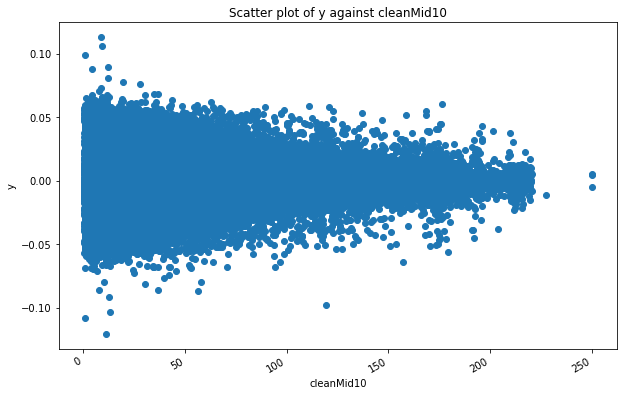

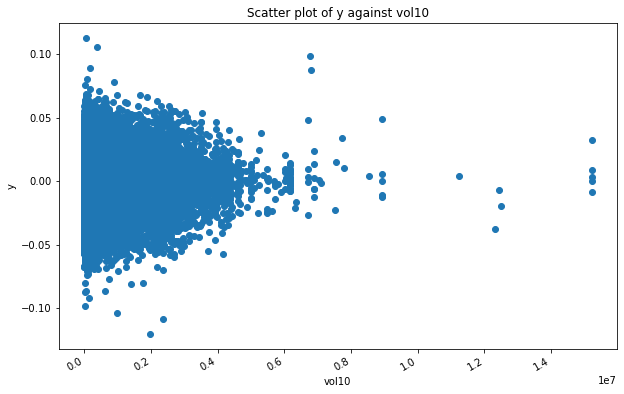

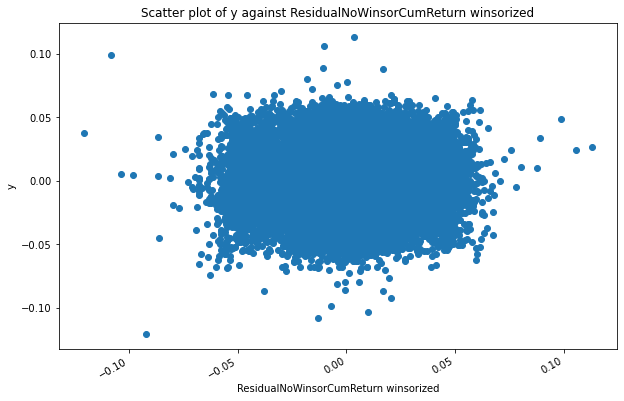

In [31]:
for x in f.columns:
    if x not in ['Id','Date','y']:
        scatter(f,x,'y')
        plt.savefig('scatter_plots/'+x.replace('/','_')+'.png')

In [104]:
df = pd.read_csv('winsorized_data20140101_20190101.csv')
df

,Date,Time,Id,ResidualNoWinsorCumReturn,RawNoWinsorCumReturn,estVol,SharesOutstanding,MDV_63,CleanMid,CumVolume,IsOpen,ResidualNoWinsorCumReturn winsorized,RawNoWinsorCumReturn winsorized,estVol winsorized,SharesOutstanding winsorized,MDV_63 winsorized,CleanMid winsorized,CumVolume winsorized
0,20140317,10:00:00.000,IDZQ0003GF7,-0.003844,0.010247,0.165159,110.580,4738192.00,33.808850,42836.0,1.0,-0.003844,0.010247,0.165159,110.580,4738192.00,33.808850,42836.0
1,20140317,10:00:00.000,IDZQ00047M8,-0.000110,0.011582,0.178034,452.860,10296983.00,6.691619,101172.0,1.0,-0.000110,0.011582,0.178034,452.860,10296983.00,6.691619,101172.0
2,20140317,10:00:00.000,IDZQ00048R1,0.009146,0.017859,0.180831,228.053,36674388.00,52.713398,248171.0,1.0,0.009146,0.017859,0.180831,228.053,36674388.00,52.713398,248171.0
3,20140317,10:00:00.000,IDZQ0005R34,0.004175,0.010514,0.148499,575.375,2769579.00,6.603942,151713.0,1.0,0.004175,0.010514,0.148499,575.375,2769579.00,6.603942,151713.0
4,20140317,10:00:00.000,IDZQ0005SC2,-0.001049,0.007604,0.113535,839.394,77615910.00,28.200540,332720.0,1.0,-0.001049,0.007604,0.113535,839.394,77615910.00,28.200540,332720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735166,20140502,17:30:00.000,ID005N1DBG4,-0.007781,-0.001133,0.125001,117.310,3156791.80,20.750942,39146.0,1.0,-0.007781,-0.001133,0.125001,117.310,3156791.80,20.750942,39146.0
2735167,20140502,17:30:00.000,ID005T2C3Z4,0.001475,-0.014326,0.334867,202.787,5553085.50,57.306843,94328.0,1.0,0.001475,-0.014326,0.334867,202.787,5553085.50,57.306843,94328.0
2735168,20140502,17:30:00.000,ID0060MBR69,-0.002395,0.002790,0.275816,500.000,746173.75,3.784309,81292.0,1.0,-0.002395,0.002790,0.275816,500.000,746173.75,3.784309,81292.0
2735169,20140502,17:30:00.000,ID00639ZL71,-0.002317,-0.006889,0.455009,1123.132,469669.84,0.914981,2134081.0,1.0,-0.002317,-0.006889,0.455009,1123.132,469669.84,0.914981,2134081.0


In [101]:
prey = pd.read_csv('drift_plot.csv')
prey = prey[['Date','Id', 'Pred']]
prey

,Date,Id,Pred
0,20140129,ID000BC0991,-0.000127
1,20140129,ID000GB7900,0.000066
2,20140129,ID000G9LML7,-0.001112
3,20140129,ID000FYX2H9,-0.000005
4,20140129,ID000FXYQ32,-0.000018
...,...,...,...
546158,20181227,ID000BKFP37,0.000422
546159,20181227,ID000BC8494,0.000055
546160,20181227,ID000BZT267,-0.000147
546161,20181227,ID000HLFD90,0.000389


In [108]:
def compute_ys(df,prey):
    pre_ret = df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id')
    pre_ret = pre_ret.unstack()
    pre_ret.name = 'pre_ret'
    rets = pre_ret.reset_index()
    
    nxt_ret1 = df[df['Time']=='10:00:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').shift(-1)
    nxt_ret1 = nxt_ret1.unstack()
    nxt_ret1.name = 'nxt_ret1'
    nxt_ret1 = nxt_ret1.reset_index()
    rets = rets.merge(nxt_ret1,on=['Id','Date'])
    
    nxt_ret2 = df[df['Time']=='16:00:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').shift(-1)-df[df['Time']=='10:00:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').shift(-1)
    nxt_ret2 = nxt_ret2.unstack()
    nxt_ret2.name = 'nxt_ret2'
    nxt_ret2 = nxt_ret2.reset_index()
    rets = rets.merge(nxt_ret2,on=['Id','Date'])
    
    nxt_ret3 = df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').shift(-1)-df[df['Time']=='16:00:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').shift(-1)
    nxt_ret3 = nxt_ret3.unstack()
    nxt_ret3.name = 'nxt_ret3'
    nxt_ret3 = nxt_ret3.reset_index()
    rets = rets.merge(nxt_ret3,on=['Id','Date'])
    
    df['w'] = 1/df['estVol']
    w = df[df['Time']=='17:30:00.000'][['Date','Id','w']]
    rets = rets.merge(prey,on=['Id','Date'])
    rets = rets.merge(w,on=['Id','Date'])
    return rets

In [109]:
rets = compute_ys(df,prey).dropna()
rets

,Id,Date,pre_ret,nxt_ret1,nxt_ret2,nxt_ret3,Pred,w
0,ID000BC0991,20140129,0.006927,-0.003415,-0.013125,-0.001079,-0.000127,3.377968
1,ID000BC0991,20140130,-0.017619,0.008601,0.011869,-0.005342,0.000605,3.448109
2,ID000BC0991,20140131,0.015128,-0.002724,0.004576,0.007020,0.000317,3.367344
3,ID000BC0991,20140203,0.008872,0.012254,0.008163,0.003828,-0.000037,3.338831
4,ID000BC0991,20140204,0.024245,0.001027,0.000409,0.001295,-0.000117,3.329948
...,...,...,...,...,...,...,...,...
546157,IDZQ000ZZS6,20140423,0.003338,0.004107,0.006130,-0.006864,-0.000069,6.459573
546158,IDZQ000ZZS6,20140424,0.003373,0.001212,0.001983,-0.007456,0.000278,6.320313
546159,IDZQ000ZZS6,20140425,-0.004260,0.001746,0.002961,-0.002172,0.000606,6.085094
546160,IDZQ000ZZS6,20140428,0.002535,-0.003045,0.005255,0.000075,-0.000023,6.135383


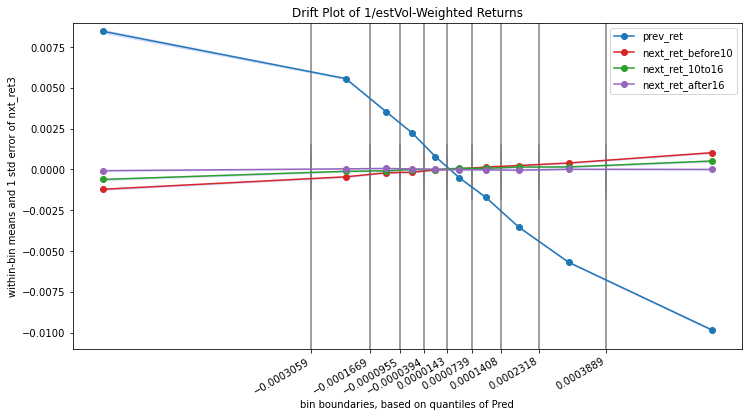

In [110]:
rets = compute_ys(df,prey).dropna()
fig, ax = plt.subplots(figsize=(12, 6))
bin_plot(rets,x_label='Pred', y_label='pre_ret', w_label='w', n_bins=10, ax=ax, label='prev_ret', color='tab:blue')
bin_plot(rets,x_label='Pred', y_label='nxt_ret1', w_label='w', n_bins=10, ax=ax, label='next_ret_before10', color='tab:red')
bin_plot(rets,x_label='Pred', y_label='nxt_ret2', w_label='w', n_bins=10, ax=ax, label='next_ret_10to16', color='tab:green')
bin_plot(rets,x_label='Pred', y_label='nxt_ret3', w_label='w', n_bins=10, ax=ax, label='next_ret_after16', color='tab:purple')
ax.set_ylim(bottom=-0.011, top=0.009)
ax.legend(loc='best')
ax.set_title('Drift Plot of 1/estVol-Weighted Returns')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');
plt.savefig('weightedDriftPlot.png')

In [111]:
def compute_features(df):
    # intraday return features
    temp = df[df['Time']=='10:00:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id') - df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = '10/17res'
    features = temp.reset_index()

    temp = df[df['Time']=='10:00:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id') - df[df['Time']=='17:30:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = '10/17raw'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='16:00:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id') - df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = '16/17res'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='16:00:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id') - df[df['Time']=='17:30:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = '16/17raw'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    # 17:30 ma raw return features
    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=1).mean()
    temp = temp.unstack()
    temp.name = '17ma1raw'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=3).mean()
    temp = temp.unstack()
    temp.name = '17ma3raw'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=5).mean()
    temp = temp.unstack()
    temp.name = '17ma5raw'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='RawNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=20).mean()
    temp = temp.unstack()
    temp.name = '17ma20raw'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    features['17ma1-3raw'] = features['17ma1raw'] - features['17ma3raw']
    features['17ma1-5raw'] = features['17ma1raw'] - features['17ma5raw']
    features['17ma1-20raw'] = features['17ma1raw'] - features['17ma20raw']

    # 17:30 ma residual return features
    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=1).mean()
    temp = temp.unstack()
    temp.name = '17ma1res'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=3).mean()
    temp = temp.unstack()
    temp.name = '17ma3res'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=5).mean()
    temp = temp.unstack()
    temp.name = '17ma5res'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='ResidualNoWinsorCumReturn winsorized',index='Date',columns='Id').rolling(window=20).mean()
    temp = temp.unstack()
    temp.name = '17ma20res'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    features['17ma1-3res'] = features['17ma1res'] - features['17ma3res']
    features['17ma1-5res'] = features['17ma1res'] - features['17ma5res']
    features['17ma1-20res'] = features['17ma1res'] - features['17ma20res']

    # market value
    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='CleanMid winsorized',index='Date',columns='Id') * df[df['Time']=='17:30:00.000'].pivot_table(values='SharesOutstanding winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = 'market_value'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    # intraday volume features
    temp = df[df['Time']=='10:00:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id') / df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = '10/17vol'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = (df[df['Time']=='16:00:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id') - df[df['Time']=='10:00:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id')) / df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = '16/17vol'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    # turnover ma
    temp = (df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id') / df[df['Time']=='17:30:00.000'].pivot_table(values='SharesOutstanding winsorized',index='Date',columns='Id')).rolling(window=1).mean()
    temp = temp.unstack()
    temp.name = 'turnover_ma1'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = (df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id') / df[df['Time']=='17:30:00.000'].pivot_table(values='SharesOutstanding winsorized',index='Date',columns='Id')).rolling(window=3).mean()
    temp = temp.unstack()
    temp.name = 'turnover_ma3'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = (df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id') / df[df['Time']=='17:30:00.000'].pivot_table(values='SharesOutstanding winsorized',index='Date',columns='Id')).rolling(window=5).mean()
    temp = temp.unstack()
    temp.name = 'turnover_ma5'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = (df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id') / df[df['Time']=='17:30:00.000'].pivot_table(values='SharesOutstanding winsorized',index='Date',columns='Id')).rolling(window=20).mean()
    temp = temp.unstack()
    temp.name = 'turnover_ma20'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    # original features 
    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='estVol winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = 'estVol'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='CleanMid winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = 'cleanMid17'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='16:00:00.000'].pivot_table(values='CleanMid winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = 'cleanMid16'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='10:00:00.000'].pivot_table(values='CleanMid winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = 'cleanMid10'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    temp = df[df['Time']=='17:30:00.000'].pivot_table(values='CumVolume winsorized',index='Date',columns='Id')
    temp = temp.unstack()
    temp.name = 'vol17'
    temp = temp.reset_index()
    features = features.merge(temp,on=['Id','Date'])

    # Normalization
    features.iloc[:,2:] = (features.iloc[:,2:] - features.iloc[:,2:].mean())/features.iloc[:,2:].std()

    # Merging with target
    target = df[df["Time"] == "17:30:00.000"][['Date','Id','ResidualNoWinsorCumReturn winsorized']].copy()
    merged = features.merge(target ,on =['Date','Id']).drop_duplicates()
    merged = merged.sort_values(['Id','Date'],ascending = [True, True])
    merged["y"] = merged.groupby(['Id'])["ResidualNoWinsorCumReturn winsorized"].shift(-1)
    merged = merged.dropna(how = 'any')
    merged = merged.sort_values('Date',ascending=True)
#     merged = merged.drop(["Id", "Date","ResidualNoWinsorCumReturn winsorized"], axis = 1)
    merged.to_csv('beforeTrainning.csv')
    return merged

In [112]:
prey

,Date,Id,Pred
0,20140129,ID000BC0991,-0.000127
1,20140129,ID000GB7900,0.000066
2,20140129,ID000G9LML7,-0.001112
3,20140129,ID000FYX2H9,-0.000005
4,20140129,ID000FXYQ32,-0.000018
...,...,...,...
546158,20181227,ID000BKFP37,0.000422
546159,20181227,ID000BC8494,0.000055
546160,20181227,ID000BZT267,-0.000147
546161,20181227,ID000HLFD90,0.000389


In [113]:
m = compute_features(df)
m

,Id,Date,10/17res,10/17raw,16/17res,16/17raw,17ma1raw,17ma3raw,17ma5raw,17ma20raw,...,turnover_ma3,turnover_ma5,turnover_ma20,estVol,cleanMid17,cleanMid16,cleanMid10,vol17,ResidualNoWinsorCumReturn winsorized,y
19,ID000BC0991,20140129,-1.488392,0.317765,0.802171,0.236943,-0.151009,-0.430231,1.611773,0.560422,...,1.083094,2.619489,2.609892,1.264334,-0.075729,-0.037792,-0.034373,-0.366874,0.006927,-0.017619
480198,ID000GB7900,20140129,-0.011564,0.182157,0.652044,-0.500606,0.372528,0.465549,-0.469229,0.222293,...,0.474314,0.668879,0.409268,-0.422455,0.443688,0.494127,0.503532,-0.486694,0.001932,-0.005147
479144,ID000G9LML7,20140129,0.577160,2.018121,0.805580,-0.810452,1.083202,2.613804,0.733572,3.174608,...,0.866928,0.592165,0.312953,3.478301,0.182947,0.223047,0.261283,-0.518421,0.024165,0.002345
476770,ID000FYX2H9,20140129,-1.048094,0.433172,0.606829,-0.108519,-0.103500,1.354725,-0.027590,0.834173,...,-0.557498,-0.679546,-0.974333,-0.313964,0.179934,0.224739,0.233286,-0.463663,0.000671,-0.013189
475968,ID000FXYQ32,20140129,-1.548991,0.030783,0.628745,0.036490,-0.056998,-0.040052,-0.040344,0.025247,...,1.513327,1.058722,0.404631,0.285056,0.406845,0.460554,0.462607,-0.451522,0.004030,-0.007422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218394,ID000BKFP37,20181227,0.744599,2.173210,1.315242,1.389626,-0.728489,-1.171057,-0.877131,-2.029301,...,-0.540219,-0.578247,-0.556401,0.133932,-0.875887,-0.866539,-0.865718,-0.153567,0.001353,0.015748
32318,ID000BC8494,20181227,-0.070719,1.699954,-0.147625,0.439672,-0.869895,-1.422273,-0.900247,-1.740165,...,0.338074,0.215287,0.100836,-0.292134,1.481721,1.578951,1.630385,-0.407669,-0.001783,0.002158
345427,ID000BZT267,20181227,0.119248,1.868539,-0.119279,-0.259777,-0.838119,0.757075,0.282411,-0.771654,...,-0.405771,-0.494246,-0.435292,0.031263,-0.700610,-0.685917,-0.679901,-0.340540,0.011291,0.009512
504027,ID000HLFD90,20181227,-1.908286,-0.271333,-0.616997,0.032212,-0.868688,0.758599,0.242829,-2.044260,...,-0.570176,-0.555022,-0.864429,1.034508,-0.812522,-0.801332,-0.801701,-0.305011,-0.011791,-0.008214


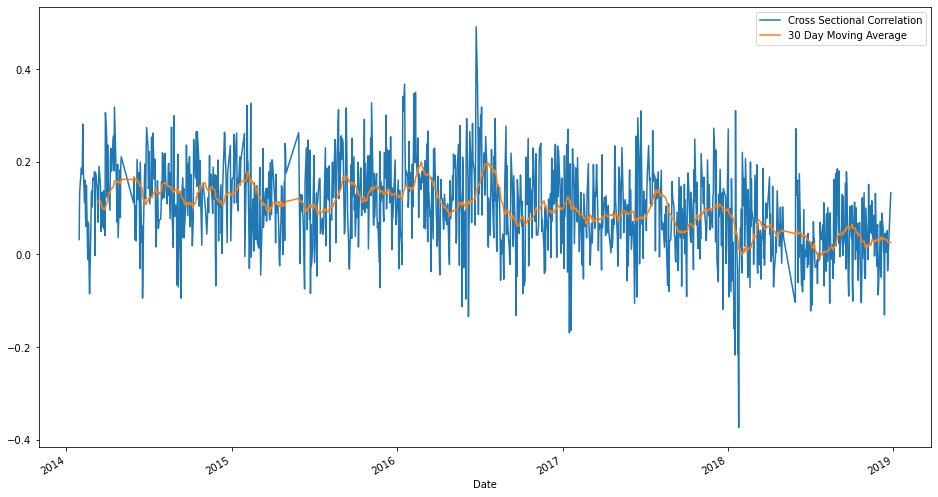

In [114]:
ypred = prey.merge(m[['Id','Date','y']],on=['Id', 'Date'])
corr = ypred.groupby(by='Date').corr()['y'].reset_index()
corr = corr[corr['level_1']=='Pred']
corr = corr[['Date','y']]
corr.Date = corr.Date.apply(str)
corr.Date = corr.Date.apply(lambda x:x[:4]+'-'+x[4:6]+'-'+x[6:])
corr.index = pd.to_datetime(corr.Date)
corr['Cross Sectional Correlation'] = corr.y
corr['30 Day Moving Average'] = corr.y.rolling(window=30).mean()
corr[['Cross Sectional Correlation','30 Day Moving Average']].plot(figsize=(16,9))
plt.savefig('corr.png')

In [91]:
ypred = prey.merge(m[['Id','Date','y']],on=['Id', 'Date'])
ypred

,Date,Id,Pred,y
0,20140213,ID000BCFRC1,-0.000106,-0.008637
1,20140213,ID000C1W6R5,0.000202,0.000706
2,20140213,ID000BC9ZX7,0.000314,-0.008503
3,20140213,ID000BHK9M3,0.000664,0.009028
4,20140213,IDZQ000Y0W9,-0.000049,-0.002505
...,...,...,...,...
271563,20181221,IDZQ000Y8Q9,0.000046,0.010208
271564,20181221,ID000BX7J69,0.000292,0.002868
271565,20181221,ID000BF1SB8,-0.000262,-0.003147
271566,20181221,ID000MM8ZX4,0.000047,-0.002296


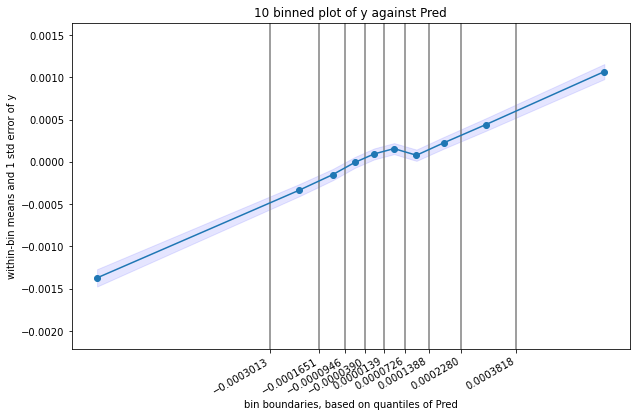

In [93]:
bin_plot(ypred,x_label='Pred', y_label='y', n_bins=10, color='tab:blue')
plt.savefig('Predvsy.png')